
# Project: FBI Gun Dataset Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**We will be analyzing FBI Gun dataset in this project and we will particularly investigate following questions:**


* Which state has the heighest number of handgun and longgun ownership?
* Which are the top 10 state that has maximum number of guns ?
* Which state has the heighest number of gun ownership on the basis of the population of state ?
* Which state has heighest increase in gun ownership on the basis of population of state ?
* Observe the trend of change of gun ownership ? 





In [1]:
#Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

   **Libraries that are essential for us to perform data analysis is imported here.**

<a id='wrangling'></a>
## Data Wrangling and Data Cleaning

In this section, we will load the data, check for cleanliness, and then trim and clean our dataset for analysis. We will document our steps carefully and justify our cleaning decisions as well.

### General Properties

In [2]:
#lets read the datas
gun=pd.read_excel('gun_data.xlsx') 
census=pd.read_csv('U.S. Census Data.csv')


**Here we are reading the two datasets and now we will view the datas it contains. It will help us understand our data and help us to generate ideas on how to answer the research questions we have posed.**

In [3]:
#Lets view some datas from top
gun.head()


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


**We are going to need months,state, permit, permit_recheck, handgun, and long_gun column only because they will only be required to answer our research question successfully.**

In [4]:
#Lets view some datas from the end
gun.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


**Here, we see nan values, they might be required to be deleted or filled later on.They will be handeled as required**

In [5]:
#Lets view number of rows and colums
gun.shape

(12485, 27)

**So, there are 12485 datas in this dataset along with 27 columns.**

In [6]:
#Lets view summary statistics
gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


**WE can see details such as in average,1165 permit has been rechecked.In average there are 5940 guns and 7810 handguns and so on.**

In [7]:
#Lets view null value and datatype of each column
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

**The month column is stated as object whill shall be changed later on. There are lots of null value that shall be handeled further on.**

In [8]:
#Lets view some datas from census , from top
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [9]:
#Lets view some data from the end
census.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Looking at the data, we will only require population census from 2010 and 2016,in order to answer our research question.We will remove all other rows lateron.**

In [10]:
#Select the columns required for our data analysis
gun = gun[gun.columns[0:6]]
gun.head(10)

,month,state,permit,permit_recheck,handgun,long_gun
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0
4,2017-09,California,57839.0,0.0,37165.0,24581.0
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0


**Here, we have selected the columns that are going to be used in this data analysis.**

In [11]:
#Lets change datatype of month and the name of the column 
gun['month'] = pd.to_datetime(gun['month'])

gun.rename(columns={"month": "date"},inplace=True)
gun.head()

,date,state,permit,permit_recheck,handgun,long_gun
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0


**Previously, we had observed the datatype of the month column to be object, so we changed that to datetime and to make it more convenient we changed the column name from month to date.**

In [12]:
gun.info()
gun.permit_recheck.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 6 columns):
date              12485 non-null datetime64[ns]
state             12485 non-null object
permit            12461 non-null float64
permit_recheck    1100 non-null float64
handgun           12465 non-null float64
long_gun          12466 non-null float64
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 585.4+ KB


11385

**Since the null value of permit_recheck is large , lets fillna with average of permit_recheck instead of dropping it and then have a look at stat once more.We might or might not use the permit recheck lateron**

In [13]:
#Replace na with mean value and check the summary stat
gun.permit_recheck.fillna((gun['permit_recheck'].mean()),inplace=True)
gun.describe()

,permit,permit_recheck,handgun,long_gun
count,12461.000000,12485.000000,12465.000000,12466.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585
std,23752.338269,2736.848174,8618.584060,9309.846140
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1165.956364,865.000000,2078.250000
50%,518.000000,1165.956364,3059.000000,5122.000000
75%,4272.000000,1165.956364,7280.000000,10380.750000
max,522188.000000,116681.000000,107224.000000,108058.000000


In [14]:
#look at no. of rows and column after taking the required columns only
gun.shape

(12485, 6)

**So, now we have 12485 datas and 6 columns.**

In [15]:
#drop na value in gun dataset 
gun= gun.dropna()

**Here we have removed the all data containing nan value. And since the no. of these value is low, it will not have any adverse effect on our data analysis.**

In [16]:
#lets look for duplicate rows
gun.duplicated().sum()

0

**There are no duplicate rows.**

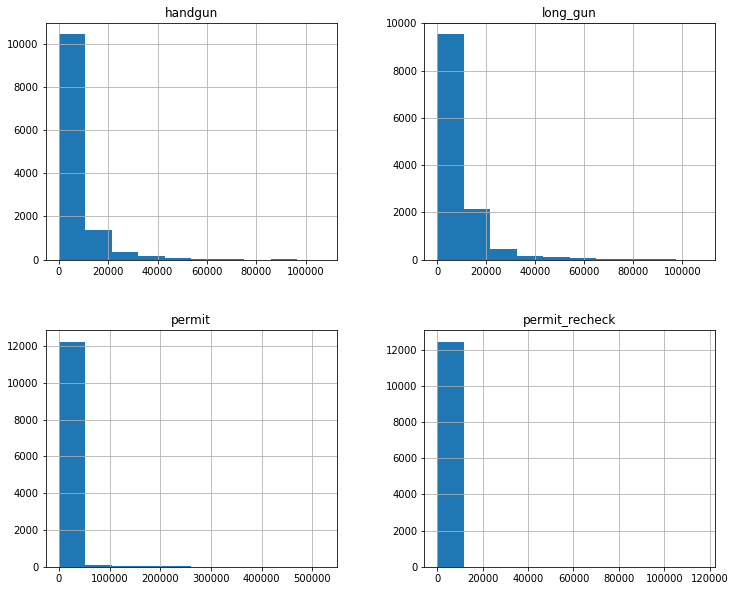

In [17]:
#lets look at histograms for gun data
gun.hist(figsize=(12,10));

In [18]:
# final number of rows and column in gun dataset
gun.shape

(12461, 6)

**Now, Lets go on towards census data.**

In [19]:
#Lets remove factnote and fact

census.drop(columns=['Fact Note',"Fact"],inplace=True)



**Here, we have removed the Fact Note and Fact columns.**

In [20]:


reqd_cen = census.loc[[0,3]]
reqd_cen = reqd_cen.transpose()
reqd_cen = reqd_cen.rename(columns={0: 'pop_2016', 3: 'pop_2010'}) 
reqd_cen = reqd_cen.reset_index()
reqd_cen = reqd_cen.rename(columns={"index": "state"})




**Here, we have selected the rows that are required for our data analysis and ignored all other datas.We have changed the row to column and column to row , reset the index and set the index name to state for column containing all the states, we have done this to bring the uniformity in dataframe in relation to gun dataframe**


In [21]:
#check for null value and datatypes
reqd_cen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
state       50 non-null object
pop_2016    50 non-null object
pop_2010    50 non-null object
dtypes: object(3)
memory usage: 1.3+ KB


**Since, the datatype of pop_2016 and pop_2010 are object, we have to change the data types to float.**

In [22]:
#Change datatype
reqd_cen['pop_2016'] = reqd_cen['pop_2016'].str.replace(',', '').astype(float)
reqd_cen['pop_2010'] = reqd_cen['pop_2010'].str.replace(',', '').astype(float)

In [23]:
#confirm datatype, null value and the changes
reqd_cen.info()
reqd_cen.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
state       50 non-null object
pop_2016    50 non-null float64
pop_2010    50 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


,state,pop_2016,pop_2010
0,Alabama,4863300.0,4779736.0
1,Alaska,741894.0,710231.0
2,Arizona,6931071.0,6392017.0
3,Arkansas,2988248.0,2915918.0
4,California,39250017.0,37253956.0


In [24]:
#lets add new column for the increase in population from 2010 to 2016
reqd_cen["population_increase"] = (reqd_cen["pop_2016"] - reqd_cen["pop_2010"] ) 
reqd_cen.head()



,state,pop_2016,pop_2010,population_increase
0,Alabama,4863300.0,4779736.0,83564.0
1,Alaska,741894.0,710231.0,31663.0
2,Arizona,6931071.0,6392017.0,539054.0
3,Arkansas,2988248.0,2915918.0,72330.0
4,California,39250017.0,37253956.0,1996061.0


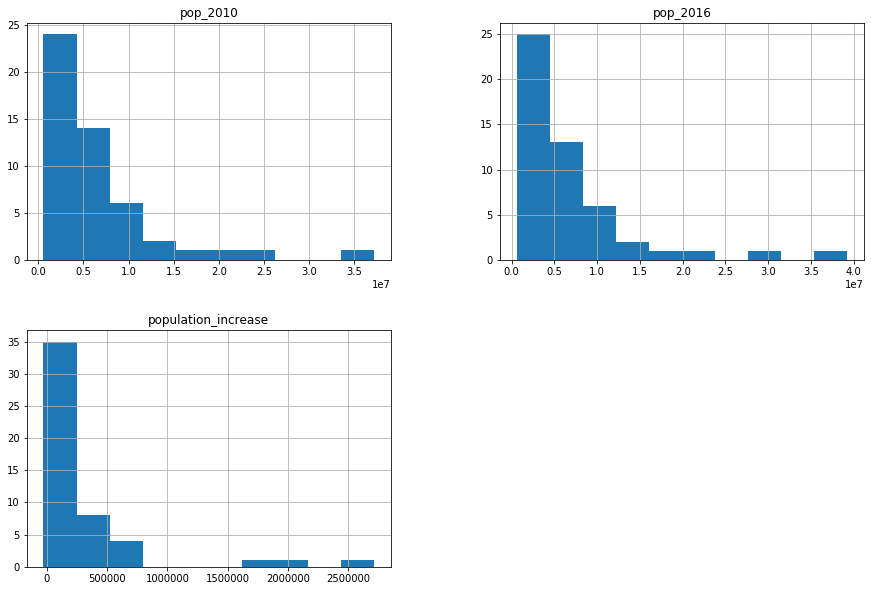

In [25]:
#lets look at all histogram for reqd_cen data
reqd_cen.hist(figsize=(15,10));

**Since we have brought uniformity in both data. We can now merge the datas.**

In [26]:
#lets merge data
df = pd.merge(gun, reqd_cen)
df.head(5)


,date,state,permit,permit_recheck,handgun,long_gun,pop_2016,pop_2010,population_increase
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,4863300.0,4779736.0,83564.0
1,2017-08-01,Alabama,19733.0,4.0,6289.0,6045.0,4863300.0,4779736.0,83564.0
2,2017-07-01,Alabama,18042.0,1.0,6046.0,4790.0,4863300.0,4779736.0,83564.0
3,2017-06-01,Alabama,19508.0,89.0,8275.0,4782.0,4863300.0,4779736.0,83564.0
4,2017-05-01,Alabama,18538.0,313.0,7198.0,4559.0,4863300.0,4779736.0,83564.0


**Here, we have successfully merged the data. And, although the population is shown for all dates , there would be no problem as we will be taking population of 2016 and 2010 for the dates ranging in only 2016 and 2010 respectively while analysing the data.**

<a id='eda'></a>
## Exploratory Data Analysis

* Now that we've trimmed and cleaned our data, we're ready to move on to exploration. 

### Question 1 : Which state has the heighest number of handgun and longgun ownership ?

In [27]:
#Lets create new column
df["total_guns"] = df["handgun"] + df["long_gun"]
df.head()
#sort the datas by date and total gun and view the data
sort_guns = df.sort_values(by=['date','total_guns'], ascending=False)
sort_guns.head(8)


,date,state,permit,permit_recheck,handgun,long_gun,pop_2016,pop_2010,population_increase,total_guns
9533,2017-09-01,Texas,31390.0,0.0,39119.0,39416.0,27862596.0,25145561.0,2717035.0,78535.0
908,2017-09-01,California,57839.0,0.0,37165.0,24581.0,39250017.0,37253956.0,1996061.0,61746.0
1816,2017-09-01,Florida,10784.0,0.0,39199.0,17949.0,20612439.0,18801310.0,1811129.0,57148.0
8398,2017-09-01,Pennsylvania,23144.0,0.0,39825.0,13222.0,12784227.0,12702379.0,81848.0,53047.0
7717,2017-09-01,Ohio,8741.0,490.0,21085.0,14998.0,11614373.0,11536504.0,77869.0,36083.0
10214,2017-09-01,Virginia,585.0,0.0,19676.0,15075.0,8411808.0,8001024.0,410784.0,34751.0
9306,2017-09-01,Tennessee,16887.0,0.0,19219.0,13746.0,6651194.0,6346105.0,305089.0,32965.0
5447,2017-09-01,Missouri,791.0,0.0,16993.0,14395.0,6093000.0,5988927.0,104073.0,31388.0


**As of 2017-09-01, Texas has the heighest gun ownership by state.**

### Research question 2 : Which are the top 10 state that has maximum number of guns ? 

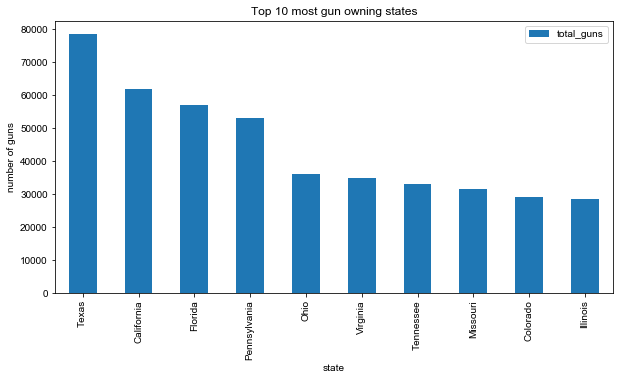

In [28]:
top_10 = sort_guns[['state','total_guns']][:10]
#sorting datas
sorted_guns = top_10['total_guns'].sort_values(ascending=False)[:10]

# Create state and total gun  which will be used as X-axis and Y-axis values in bar graph.
high_guns1=pd.DataFrame()
state=[]
total_guns=[]

# Fill the vallues from raw data to the lists.
for i in sorted_guns.index:
    state.append(df.loc[i,'state'])
    total_guns.append(sorted_guns.loc[i])
high_guns1['state']=state
high_guns1['total_guns']=total_guns
high_guns1.set_index('state',inplace=True)

# Plot
high_guns1.plot(kind ='bar',figsize=(10,5))
plt.title('Top 10 most gun owning states');
plt.ylabel('number of guns');
sns.set_style('darkgrid')



**Top 10 states which has maximum no. of guns as of 2017 is Texas, California,Florida, and so on . It is as listed in the histogram above.**

### Research Question 3 : Which 10 state has the heighest number of gun ownership on the basis of the population of state ?

In [29]:
#Lets add two new columns
df["Gun_proportion_16"]= df["total_guns"] / df["pop_2016"] 
df["Gun_proportion_10"]= df["total_guns"] / df["pop_2010"] 
df.head(2)

,date,state,permit,permit_recheck,handgun,long_gun,pop_2016,pop_2010,population_increase,total_guns,Gun_proportion_16,Gun_proportion_10
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,4863300.0,4779736.0,83564.0,12054.0,0.002479,0.002522
1,2017-08-01,Alabama,19733.0,4.0,6289.0,6045.0,4863300.0,4779736.0,83564.0,12334.0,0.002536,0.002580


**Since, the census for 2016, was of date july 1 2016, we will look at the population to gun ratio on this day.
And for 2010, april 1 2010 is taken** 

In [30]:
high_pro_16 = df.query("date == '2016-07-01'")
#high proportion in 2016
high_pro_16 = high_pro_16.sort_values(by=['Gun_proportion_16'], ascending=False)
high_pro_16.head(10)



,date,state,permit,permit_recheck,handgun,long_gun,pop_2016,pop_2010,population_increase,total_guns,Gun_proportion_16,Gun_proportion_10
241,2016-07-01,Alaska,215.0,0.0,2898.0,2816.0,741894.0,710231.0,31663.0,5714.0,0.007702,0.008045
3873,2016-07-01,Louisiana,2595.0,0.0,21637.0,12252.0,4681666.0,4533372.0,148294.0,33889.0,0.007239,0.007475
6369,2016-07-01,New Hampshire,3882.0,0.0,5200.0,3716.0,1334795.0,1316470.0,18325.0,8916.0,0.006680,0.006773
5688,2016-07-01,Montana,1356.0,0.0,2894.0,3882.0,1042520.0,989415.0,53105.0,6776.0,0.006500,0.006848
9320,2016-07-01,Tennessee,1915.0,11933.0,26276.0,16118.0,6651194.0,6346105.0,305089.0,42394.0,0.006374,0.006680
9093,2016-07-01,South Dakota,1179.0,0.0,2490.0,3004.0,865454.0,814180.0,51274.0,5494.0,0.006348,0.006748
10681,2016-07-01,West Virginia,1992.0,0.0,6417.0,5134.0,1831102.0,1852994.0,-21892.0,11551.0,0.006308,0.006234
1149,2016-07-01,Colorado,6372.0,0.0,18765.0,15176.0,5540545.0,5029196.0,511349.0,33941.0,0.006126,0.006749
8185,2016-07-01,Oregon,21.0,0.0,14284.0,10507.0,4093465.0,3831074.0,262391.0,24791.0,0.006056,0.006471
11135,2016-07-01,Wyoming,597.0,0.0,1619.0,1769.0,585501.0,563626.0,21875.0,3388.0,0.005786,0.006011


**We can observe that in 2016, Alaska has the heighest gun ownership in terms of population.**

In [31]:
high_pro_10 = df.query("date == '2010-04-01'")
#high proportion in 2010
high_pro_10 = high_pro_10.sort_values(by=['Gun_proportion_10'], ascending=False)
high_pro_10.head(10)

,date,state,permit,permit_recheck,handgun,long_gun,pop_2016,pop_2010,population_increase,total_guns,Gun_proportion_16,Gun_proportion_10
316,2010-04-01,Alaska,0.0,1165.956364,2650.0,3136.0,741894.0,710231.0,31663.0,5786.0,0.007799,0.008147
5763,2010-04-01,Montana,906.0,1165.956364,2172.0,3824.0,1042520.0,989415.0,53105.0,5996.0,0.005751,0.006060
10303,2010-04-01,Virginia,0.0,1165.956364,25259.0,18158.0,8411808.0,8001024.0,410784.0,43417.0,0.005161,0.005426
11210,2010-04-01,Wyoming,532.0,1165.956364,1295.0,1700.0,585501.0,563626.0,21875.0,2995.0,0.005115,0.005314
9168,2010-04-01,South Dakota,0.0,1165.956364,1396.0,2785.0,865454.0,814180.0,51274.0,4181.0,0.004831,0.005135
10756,2010-04-01,West Virginia,0.0,1165.956364,3927.0,4534.0,1831102.0,1852994.0,-21892.0,8461.0,0.004621,0.004566
7579,2010-04-01,North Dakota,608.0,1165.956364,888.0,2004.0,757952.0,672591.0,85361.0,2892.0,0.003816,0.004300
1224,2010-04-01,Colorado,0.0,1165.956364,10998.0,9403.0,5540545.0,5029196.0,511349.0,20401.0,0.003682,0.004057
8260,2010-04-01,Oregon,35.0,1165.956364,7445.0,8065.0,4093465.0,3831074.0,262391.0,15510.0,0.003789,0.004048
8487,2010-04-01,Pennsylvania,211.0,1165.956364,1.0,49644.0,12784227.0,12702379.0,81848.0,49645.0,0.003883,0.003908


**We can observe that in 2010, Alaska has the heighest gun ownership in terms of population to gun ratio..**

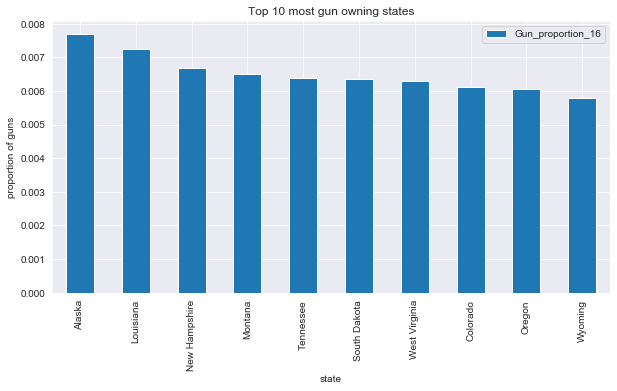

In [32]:
sorted_guns1 = high_pro_16['Gun_proportion_16'].sort_values(ascending=False)[:10]

# Create state and total gun proportion for 2016 list which will be used as X-axis and Y-axis values in bar graph.
high_guns2=pd.DataFrame()
state=[]
Gun_proportion_16=[]

# Fill the vallues from raw data to the lists.
for i in sorted_guns1.index:
    state.append(df.loc[i,'state'])
    Gun_proportion_16.append(sorted_guns1.loc[i])
high_guns2['state']=state
high_guns2['Gun_proportion_16']=Gun_proportion_16
high_guns2.set_index('state',inplace=True)

# Plot
high_guns2.plot(kind ='bar',figsize=(10,5))
plt.title('Top 10 most gun owning states');
plt.ylabel('proportion of guns');
sns.set_style('darkgrid')


**Here, we can see top 10 states with population to gun proportion in 2016. Still Alaska ranks first.**

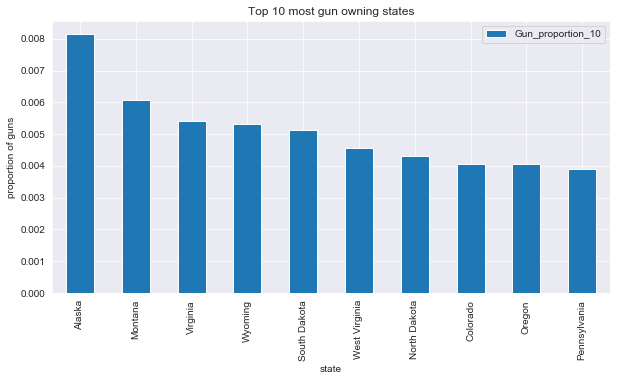

In [33]:
sorted_guns2 = high_pro_10['Gun_proportion_10'].sort_values(ascending=False)[:10]

# Create state and total gun proportion for 2010 list which will be used as X-axis and Y-axis values in bar graph.
high_guns3=pd.DataFrame()
state=[]
Gun_proportion_10=[]

# Fill the vallues from raw data to the lists.
for i in sorted_guns2.index:
    state.append(df.loc[i,'state'])
    Gun_proportion_10.append(sorted_guns2.loc[i])
high_guns3['state']=state
high_guns3['Gun_proportion_10']=Gun_proportion_10
high_guns3.set_index('state',inplace=True)

# Plot
high_guns3.plot(kind ='bar',figsize=(10,5))
plt.title('Top 10 most gun owning states');
plt.ylabel('proportion of guns');
sns.set_style('darkgrid')

**Here, we can see top 10 states with population to gun proportion in 2010 in terms of population to gun ratio.**

### Research Question 4 :  Which state has heighest increase in gun ownership on the basis of population of state ?

In [34]:
#add new column
df["changed_prop"] = (df["Gun_proportion_16"] - df["Gun_proportion_10"]) 
df.head()


,date,state,permit,permit_recheck,handgun,long_gun,pop_2016,pop_2010,population_increase,total_guns,Gun_proportion_16,Gun_proportion_10,changed_prop
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,4863300.0,4779736.0,83564.0,12054.0,0.002479,0.002522,-0.000043
1,2017-08-01,Alabama,19733.0,4.0,6289.0,6045.0,4863300.0,4779736.0,83564.0,12334.0,0.002536,0.002580,-0.000044
2,2017-07-01,Alabama,18042.0,1.0,6046.0,4790.0,4863300.0,4779736.0,83564.0,10836.0,0.002228,0.002267,-0.000039
3,2017-06-01,Alabama,19508.0,89.0,8275.0,4782.0,4863300.0,4779736.0,83564.0,13057.0,0.002685,0.002732,-0.000047
4,2017-05-01,Alabama,18538.0,313.0,7198.0,4559.0,4863300.0,4779736.0,83564.0,11757.0,0.002417,0.002460,-0.000042


In [35]:
inc_pro_16 = df.query("date == '2016-07-01'")
#changed proportion in 2016
new = inc_pro_16.sort_values(by=['changed_prop'], ascending=False)

new.head(12)

,date,state,permit,permit_recheck,handgun,long_gun,pop_2016,pop_2010,population_increase,total_guns,Gun_proportion_16,Gun_proportion_10,changed_prop
10681,2016-07-01,West Virginia,1992.0,0.0,6417.0,5134.0,1831102.0,1852994.0,-21892.0,11551.0,0.006308,0.006234,0.000075
10001,2016-07-01,Vermont,0.0,0.0,1293.0,1201.0,624594.0,625741.0,-1147.0,2494.0,0.003993,0.003986,0.000007
2738,2016-07-01,Illinois,125075.0,8969.0,21421.0,11881.0,12801539.0,12830632.0,-29093.0,33302.0,0.002601,0.002596,0.000006
2284,2016-07-01,Hawaii,1563.0,0.0,0.0,0.0,1428557.0,1360301.0,68256.0,0.0,0.000000,0.000000,0.000000
1376,2016-07-01,Connecticut,14156.0,0.0,11328.0,4015.0,3576452.0,3574097.0,2355.0,15343.0,0.004290,0.004293,-0.000003
8639,2016-07-01,Rhode Island,0.0,0.0,1133.0,951.0,1056426.0,1052567.0,3859.0,2084.0,0.001973,0.001980,-0.000007
4780,2016-07-01,Michigan,15869.0,3753.0,11308.0,8095.0,9928300.0,9883640.0,44660.0,19403.0,0.001954,0.001963,-0.000009
4099,2016-07-01,Maine,540.0,0.0,3426.0,3026.0,1331479.0,1328361.0,3118.0,6452.0,0.004846,0.004857,-0.000011
6596,2016-07-01,New Jersey,0.0,0.0,5708.0,4155.0,8944469.0,8791894.0,152575.0,9863.0,0.001103,0.001122,-0.000019
3192,2016-07-01,Iowa,9391.0,11.0,186.0,2227.0,3134693.0,3046355.0,88338.0,2413.0,0.000770,0.000792,-0.000022


**We can observe that, west virginia has the heighest increase of gun ownership.**

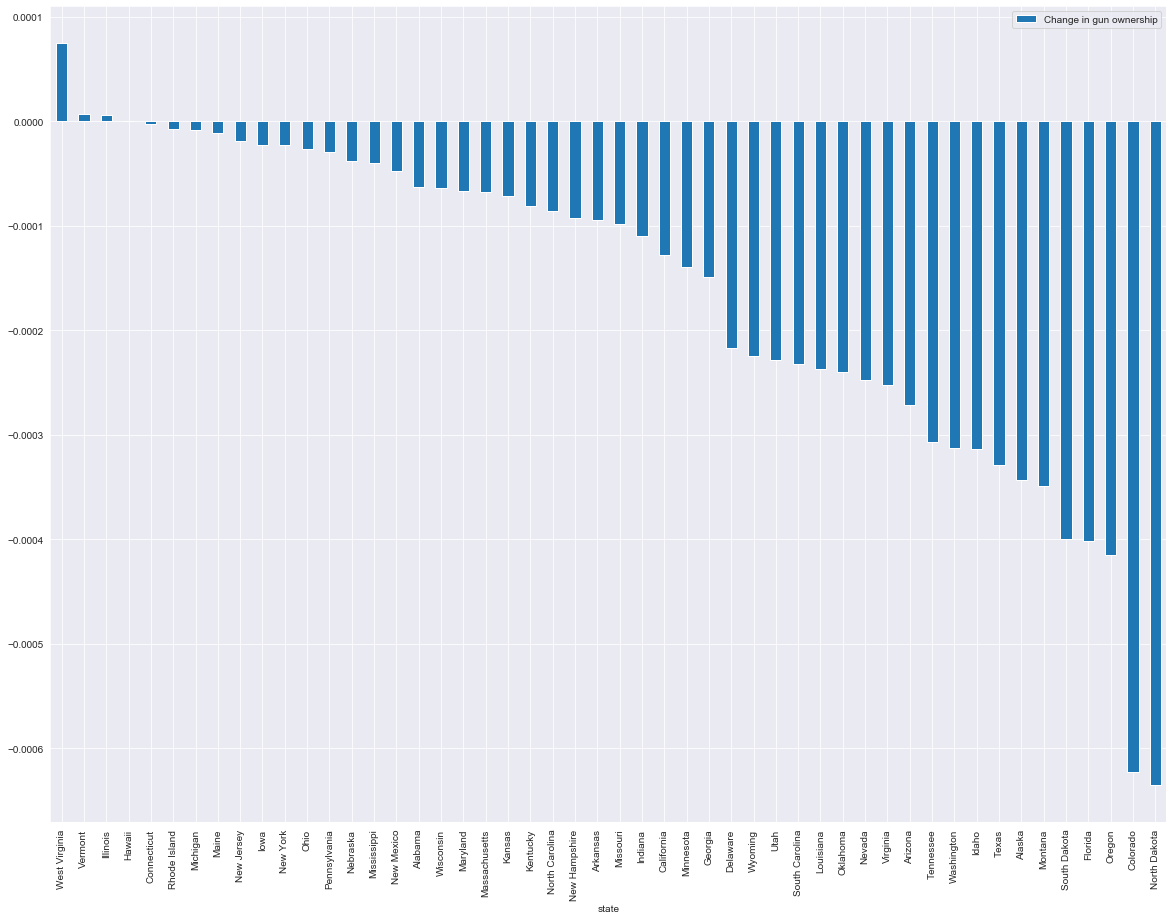

In [36]:
new.plot.bar(y='changed_prop',x='state',figsize=(20,15),label="Change in gun ownership" );

**whereas, the most decrease of gun ownership can be seen in north dakota.**

### Research Question 5 : Observe the trend of change of gun ownership ?

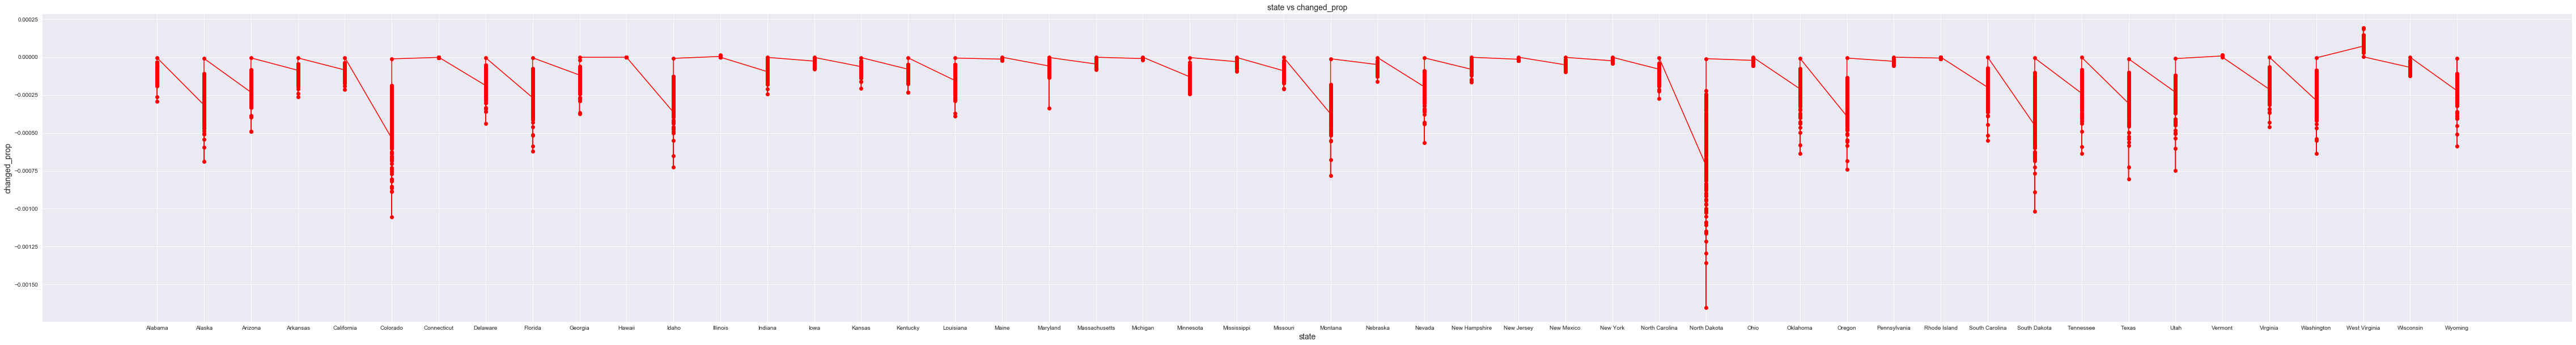

In [37]:
#lets plot a line chart to see what is happening in every state
plt.figure(figsize=(80,10))
plt.plot(df['state'], df['changed_prop'], color='red', marker='o')
plt.title('state vs changed_prop', fontsize=14)
plt.xlabel('state', fontsize=14)
plt.ylabel('changed_prop', fontsize=14)
plt.grid(True)
plt.show()

**We can observe that the overall trend of gun ownership has been decreasing as the points in ever city is falling .**

<a id='conclusions'></a>
## Conclusions

**Following observations were made from the above dataset** :

* As of 2017-09-01, Texas has the heighest gun ownership by state.
* Top 10 states which has maximum no. of guns as of 2017 is Texas, California,Florida, and so on . It is as listed in the histogram above in question 2 .
* We can see top 10 states with population to gun proportion in 2010 , where Alaska ranks first.
* In 2016, Alaska has the heighest gun ownership in terms of population to gun ratio, yet again.
* We can observe that, West Virginia has the heighest increase of gun ownership from 2010 to 2016.
* The most decrease of gun ownership can be seen in North Dakota.
* We can observe that the overall trend of gun ownership is decreasing.